In [56]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
import warnings
warnings.filterwarnings('ignore')

In [58]:
df = pd.read_csv(r'C:\Users\sylvia.pereira\OneDrive - alteryx.com\Desktop\Ryerson\CIND_820 XJH\Dataset_BBB_Classification_Final.csv')
df.head()

,id_student,final_result,forumng,glossary,homepage,oucollaborate,oucontent,ouelluminate,questionnaire,quiz,resource,sharedsubpage,subpage,url
0,275296,Fail,13,0,64,0,60,0,0,8,12,0,5,3
1,556863,Pass,258,0,90,8,354,0,4,163,10,0,26,4
2,544978,Fail,22,0,8,0,1,0,0,32,2,0,4,2
3,465599,Pass,355,0,150,0,0,0,0,58,9,0,8,7
4,157795,Pass,863,3,412,0,17,0,0,78,54,0,54,38


In [59]:
df.describe()

,id_student,forumng,glossary,homepage,oucollaborate,oucontent,ouelluminate,questionnaire,quiz,resource,sharedsubpage,subpage,url
count,5.367000e+03,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000,5367.000000
mean,6.866971e+05,371.597354,1.712130,199.648221,2.266257,164.891187,0.247252,1.248370,82.432644,37.050494,0.027017,47.668716,14.857462
std,5.205086e+05,884.072073,4.968448,251.352385,6.705988,363.850162,1.531438,3.678921,68.825723,58.324259,0.205715,55.911795,22.281565
min,2.362900e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.104545e+05,22.000000,0.000000,60.000000,0.000000,1.000000,0.000000,0.000000,45.000000,10.000000,0.000000,15.000000,2.000000
50%,5.793160e+05,110.000000,0.000000,137.000000,0.000000,17.000000,0.000000,0.000000,75.000000,24.000000,0.000000,32.000000,7.000000
75%,6.335650e+05,341.000000,2.000000,248.000000,1.000000,87.000000,0.000000,0.000000,104.000000,46.000000,0.000000,59.000000,18.000000
max,2.698588e+06,13154.000000,134.000000,4120.000000,107.000000,3978.000000,47.000000,44.000000,950.000000,2808.000000,4.000000,822.000000,297.000000


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5367 entries, 0 to 5366
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id_student     5367 non-null   int64 
 1   final_result   5367 non-null   object
 2   forumng        5367 non-null   int64 
 3   glossary       5367 non-null   int64 
 4   homepage       5367 non-null   int64 
 5   oucollaborate  5367 non-null   int64 
 6   oucontent      5367 non-null   int64 
 7   ouelluminate   5367 non-null   int64 
 8   questionnaire  5367 non-null   int64 
 9   quiz           5367 non-null   int64 
 10  resource       5367 non-null   int64 
 11  sharedsubpage  5367 non-null   int64 
 12  subpage        5367 non-null   int64 
 13  url            5367 non-null   int64 
dtypes: int64(13), object(1)
memory usage: 587.1+ KB


In [61]:
df.isna().sum()

id_student       0
final_result     0
forumng          0
glossary         0
homepage         0
oucollaborate    0
oucontent        0
ouelluminate     0
questionnaire    0
quiz             0
resource         0
sharedsubpage    0
subpage          0
url              0
dtype: int64

In [62]:
df = df.drop('id_student', 1)

In [63]:
df.corr()

,forumng,glossary,homepage,oucollaborate,oucontent,ouelluminate,questionnaire,quiz,resource,sharedsubpage,subpage,url
forumng,1.000000,0.200976,0.797799,-0.008108,-0.049394,0.174114,-0.049329,0.201232,0.163625,0.151446,0.369216,0.462578
glossary,0.200976,1.000000,0.298083,0.310087,0.385879,0.047760,0.294423,0.285198,0.182654,0.050641,0.230762,0.109660
homepage,0.797799,0.298083,1.000000,0.178866,0.194748,0.151303,0.145933,0.414553,0.360085,0.171477,0.542635,0.536492
oucollaborate,-0.008108,0.310087,0.178866,1.000000,0.573592,-0.051269,0.476548,0.354916,0.191737,-0.024128,0.089203,-0.109750
oucontent,-0.049394,0.385879,0.194748,0.573592,1.000000,-0.071851,0.798210,0.516748,0.234057,-0.036172,0.079380,-0.185235
ouelluminate,0.174114,0.047760,0.151303,-0.051269,-0.071851,1.000000,-0.053737,0.027446,0.067041,0.078171,0.175557,0.094822
questionnaire,-0.049329,0.294423,0.145933,0.476548,0.798210,-0.053737,1.000000,0.439390,0.182804,-0.032754,0.045934,-0.178881
quiz,0.201232,0.285198,0.414553,0.354916,0.516748,0.027446,0.439390,1.000000,0.272898,0.051718,0.312136,0.150676
resource,0.163625,0.182654,0.360085,0.191737,0.234057,0.067041,0.182804,0.272898,1.000000,0.086929,0.605796,0.285437
sharedsubpage,0.151446,0.050641,0.171477,-0.024128,-0.036172,0.078171,-0.032754,0.051718,0.086929,1.000000,0.163143,0.151597


In [64]:
!pip install pandas-profiling
import pandas_profiling as pp

# Creating the profiling report
profile = pp.ProfileReport(df, title="Profiling Report")

# Saving the report to an HTML file
profile.to_file("report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Feature Importance

In [65]:
import pandas as pd
import numpy as np

# create a correlation matrix
corr_matrix = df.corr().abs()

# select upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# drop the highly correlated columns from the dataframe
df.drop(df[to_drop], axis=1, inplace=True)

# print the remaining columns
print(df.columns)

Index(['final_result', 'forumng', 'glossary', 'oucollaborate', 'oucontent',
       'ouelluminate', 'quiz', 'resource', 'sharedsubpage', 'subpage', 'url'],
      dtype='object')


In [66]:
X = df.drop('final_result', 1)
y = df['final_result']
X.shape

(5367, 10)

In [67]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif
import sklearn.feature_selection as fs
from numpy import array

In [68]:
# this function will take in X, y variables 
# with criteria, and return a dataframe
# with most important columns
# based on that criteria
def featureSelect_dataframe(X, y, criteria, k):

    # initialize our function/method
    reg = SelectKBest(criteria, k=k).fit(X,y)
    
    # transform after creating the reg (so we can use getsupport)
    X_transformed = reg.transform(X)

    # filter down X based on kept columns
    X = X[[val for i,val in enumerate(X.columns) if reg.get_support()[i]]]

    # return that dataframe
    return X

New_X = featureSelect_dataframe(X, y, mutual_info_classif, 5)
print('Reduced features:')
New_X.head()

Reduced features:


,forumng,oucontent,quiz,resource,subpage
0,13,60,8,12,5
1,258,354,163,10,26
2,22,1,32,2,4
3,355,0,58,9,8
4,863,17,78,54,54


In [69]:
mutual_info = mutual_info_classif(X,y)
mutual_info

array([0.06496806, 0.01647147, 0.02826097, 0.06762744, 0.00119178,
       0.14938621, 0.08794542, 0.        , 0.09152424, 0.02892772])

In [70]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending = False)

quiz             0.149386
subpage          0.091524
resource         0.087945
oucontent        0.067627
forumng          0.064968
url              0.028928
oucollaborate    0.028261
glossary         0.016471
ouelluminate     0.001192
sharedsubpage    0.000000
dtype: float64

<AxesSubplot:>

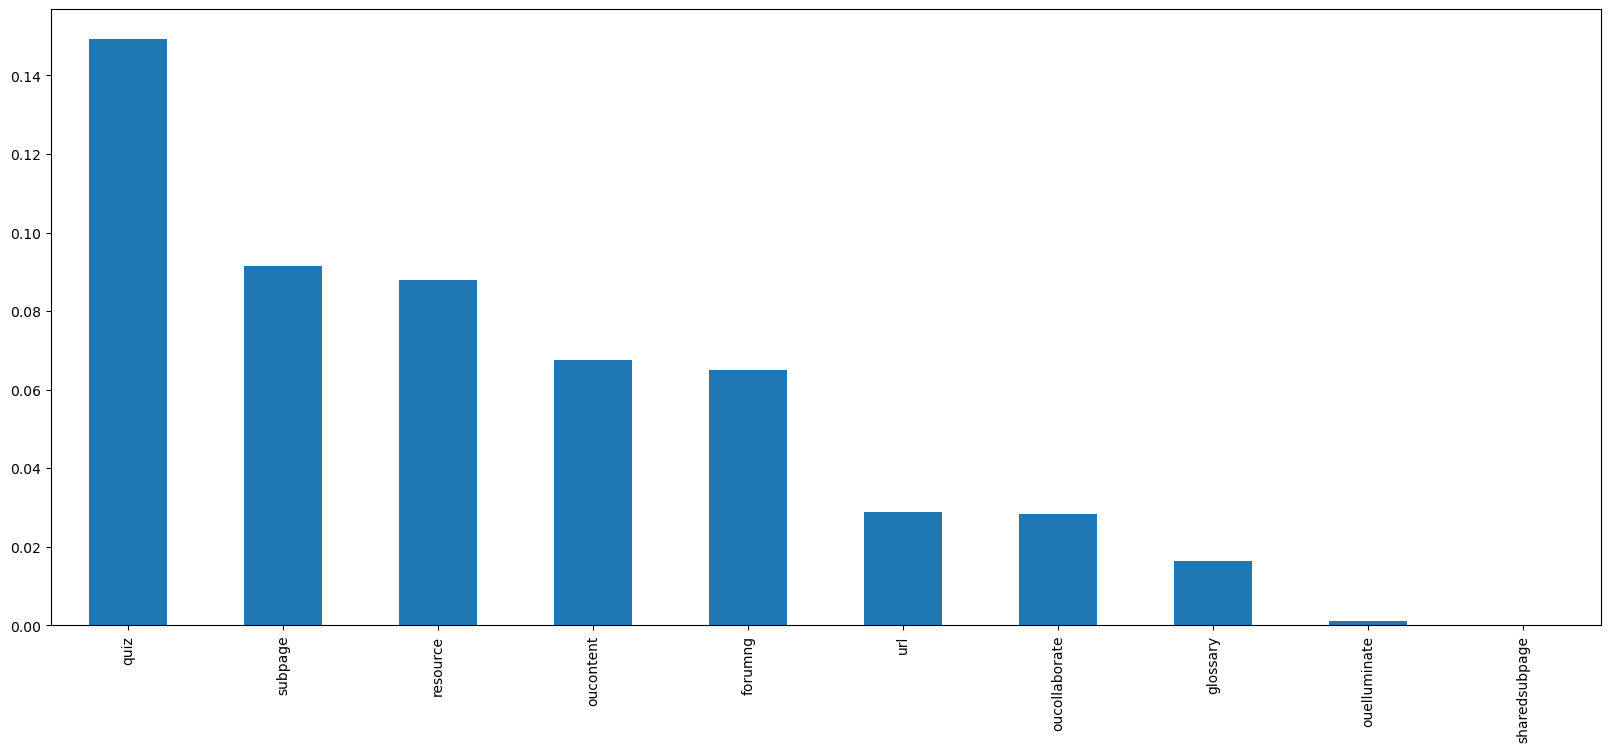

In [71]:
mutual_info.sort_values(ascending = False).plot.bar(figsize=(20,8))

In [72]:
sel_ten = SelectKBest(mutual_info_classif, k=10)
sel_ten.fit(X.fillna(0), y)
X.columns[sel_ten.get_support()]

Index(['forumng', 'glossary', 'oucollaborate', 'oucontent', 'ouelluminate',
       'quiz', 'resource', 'sharedsubpage', 'subpage', 'url'],
      dtype='object')

<AxesSubplot:>

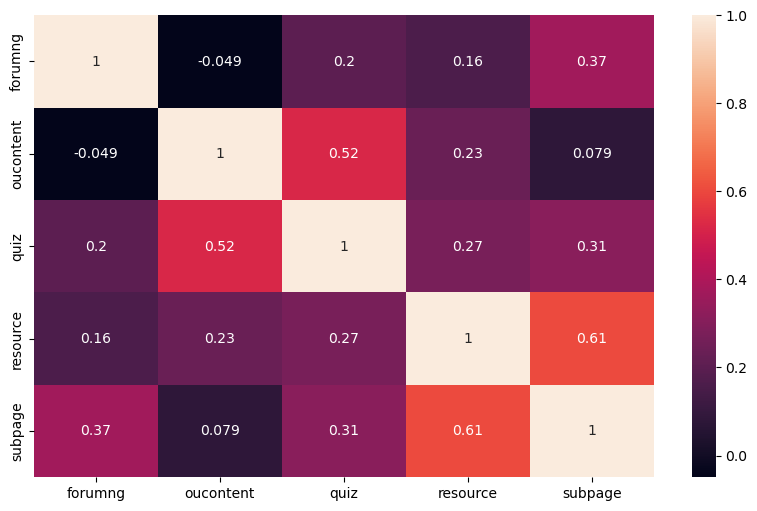

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

cor = New_X.corr()
plt.figure(figsize = (10,6))
sns.heatmap(cor, annot = True)